In [1]:
from pamod.base import Patient, Side, Tooth
from pamod.wrapper import BenchmarkWrapper, EvaluatorWrapper

wrapper = BenchmarkWrapper(
    task="pocketclosure",
    encodings=["one_hot"],
    learners=["xgb", "lr"],
    tuning_methods=["holdout"],
    hpo_methods=["hebo"],
    criteria=["f1"],
    sampling=[None],
    factor=2,
    n_configs=3,
    n_jobs=-1,
)

baseline = wrapper.baseline()
benchmark, learners = wrapper.wrapped_benchmark()

In [2]:
baseline

,Model,Encoding,F1 Score,Precision,Recall,Accuracy,Brier Score,ROC AUC Score,Confusion Matrix,Best Threshold
0,Dummy Classifier,one_hot,0.000000,0.00000,0.000000,0.900635,0.089518,0.500000,"[[0, 2002], [0, 18146]]",None
1,Logistic Regression,one_hot,0.474113,0.68101,0.363636,0.919843,0.058961,0.909538,"[[728, 1274], [341, 17805]]",None
2,Random Forest,one_hot,0.462040,0.66448,0.354146,0.918056,0.060440,0.901533,"[[709, 1293], [358, 17788]]",None


In [3]:
benchmark

,Task,Learner,Tuning,HPO,Criterion,Sampling,Factor,F1 Score,Precision,Recall,Accuracy,Brier Score,ROC AUC Score,Confusion Matrix,Best Threshold
0,pocketclosure,xgb,holdout,hebo,f1,None,2,0.5654,0.5363,0.5979,0.9087,0.0589,0.9115,"[[1197, 805], [1035, 17111]]",0.71
1,pocketclosure,lr,holdout,hebo,f1,None,2,0.5748,0.4932,0.6888,0.8987,0.1219,0.9120,"[[1379, 623], [1417, 16729]]",0.28


In [4]:
evaluator = EvaluatorWrapper(
    learners_dict=learners,
    criterion="f1",
    aggregate=True,
)

In [5]:
evaluator.average_over_splits()

,Task,Learner,Criterion,Sampling,Factor,F1 Score,Precision,Recall,Accuracy,Brier Score,ROC AUC Score,Best Threshold,Confusion Matrix
0,pocketclosure,lr,f1,None,2.0,0.5333,0.4493,0.6571,0.8938,0.1264,0.9022,0.28,"[[1214, 634], [1480, 16607]]"


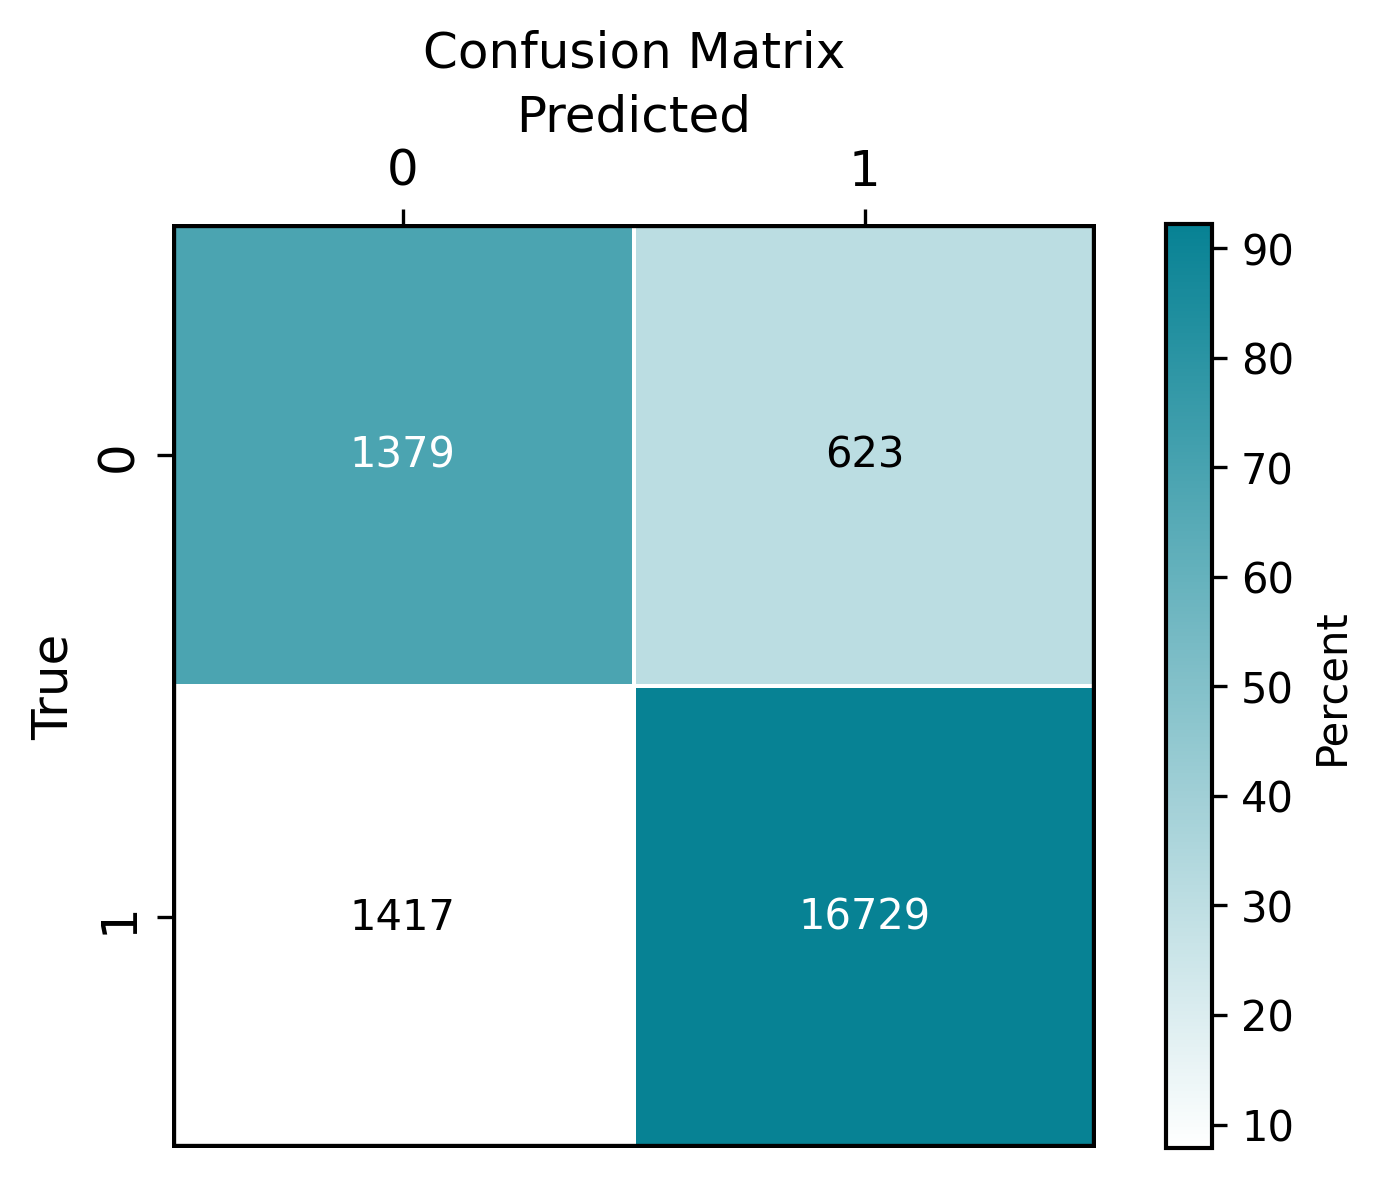

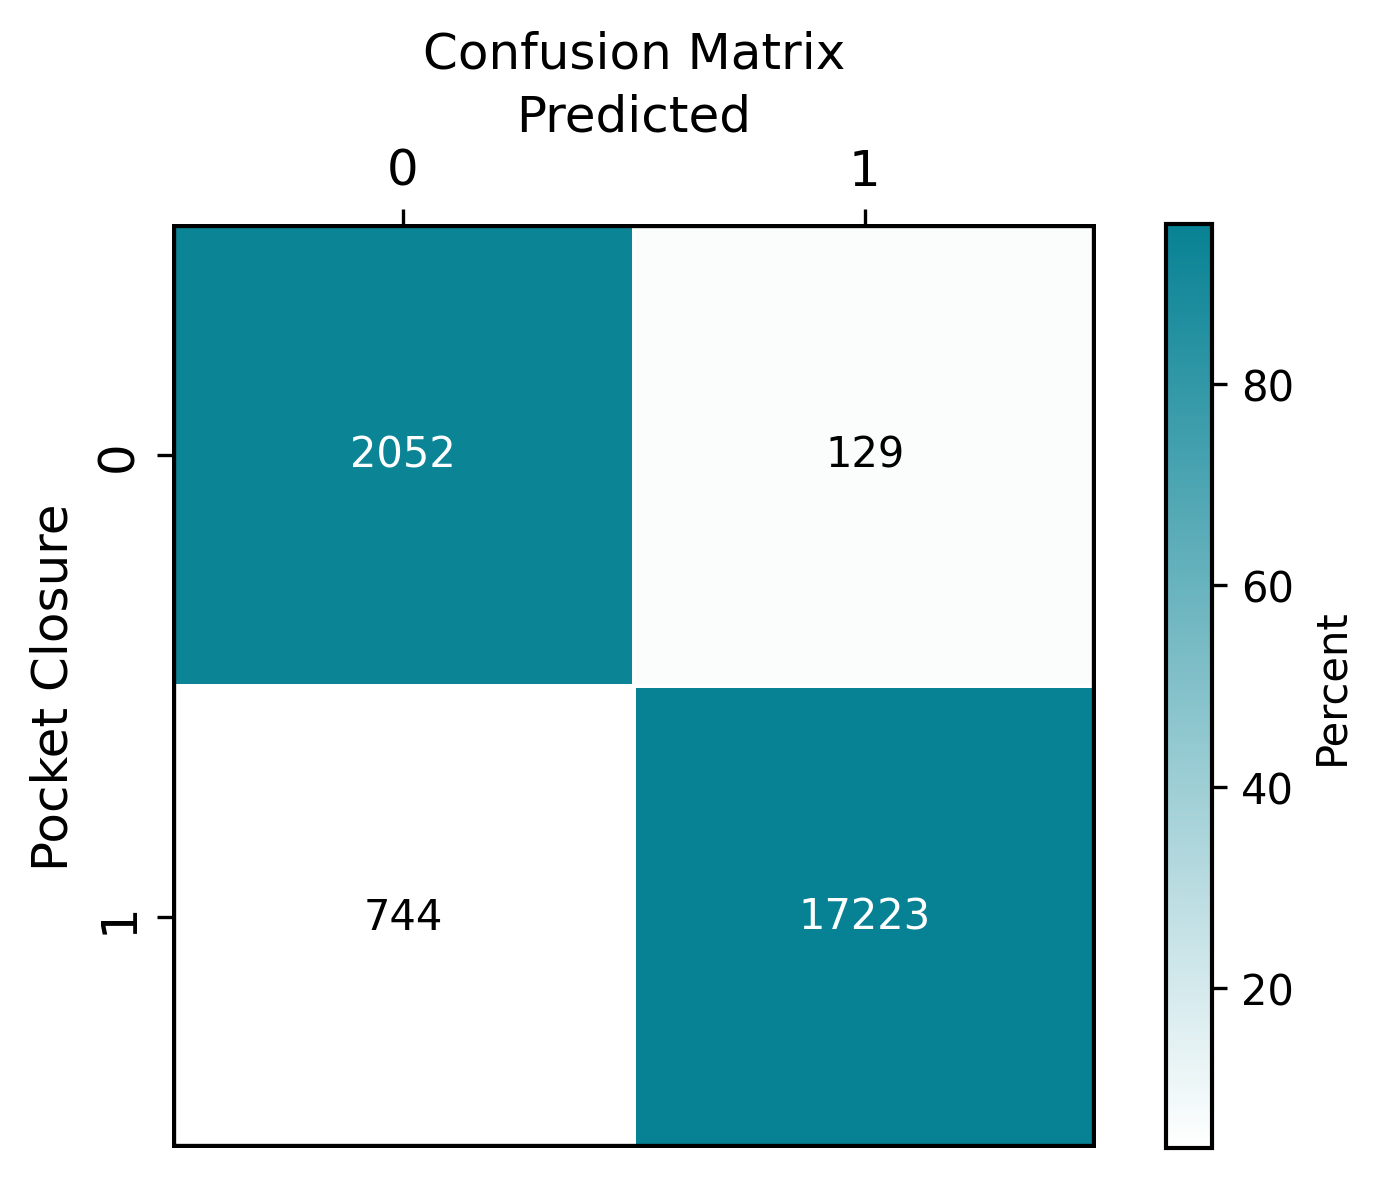

Average and Median Brier Scores by y:
   y      mean    median
0  0  0.115405  0.018754
1  1  0.122590  0.024199


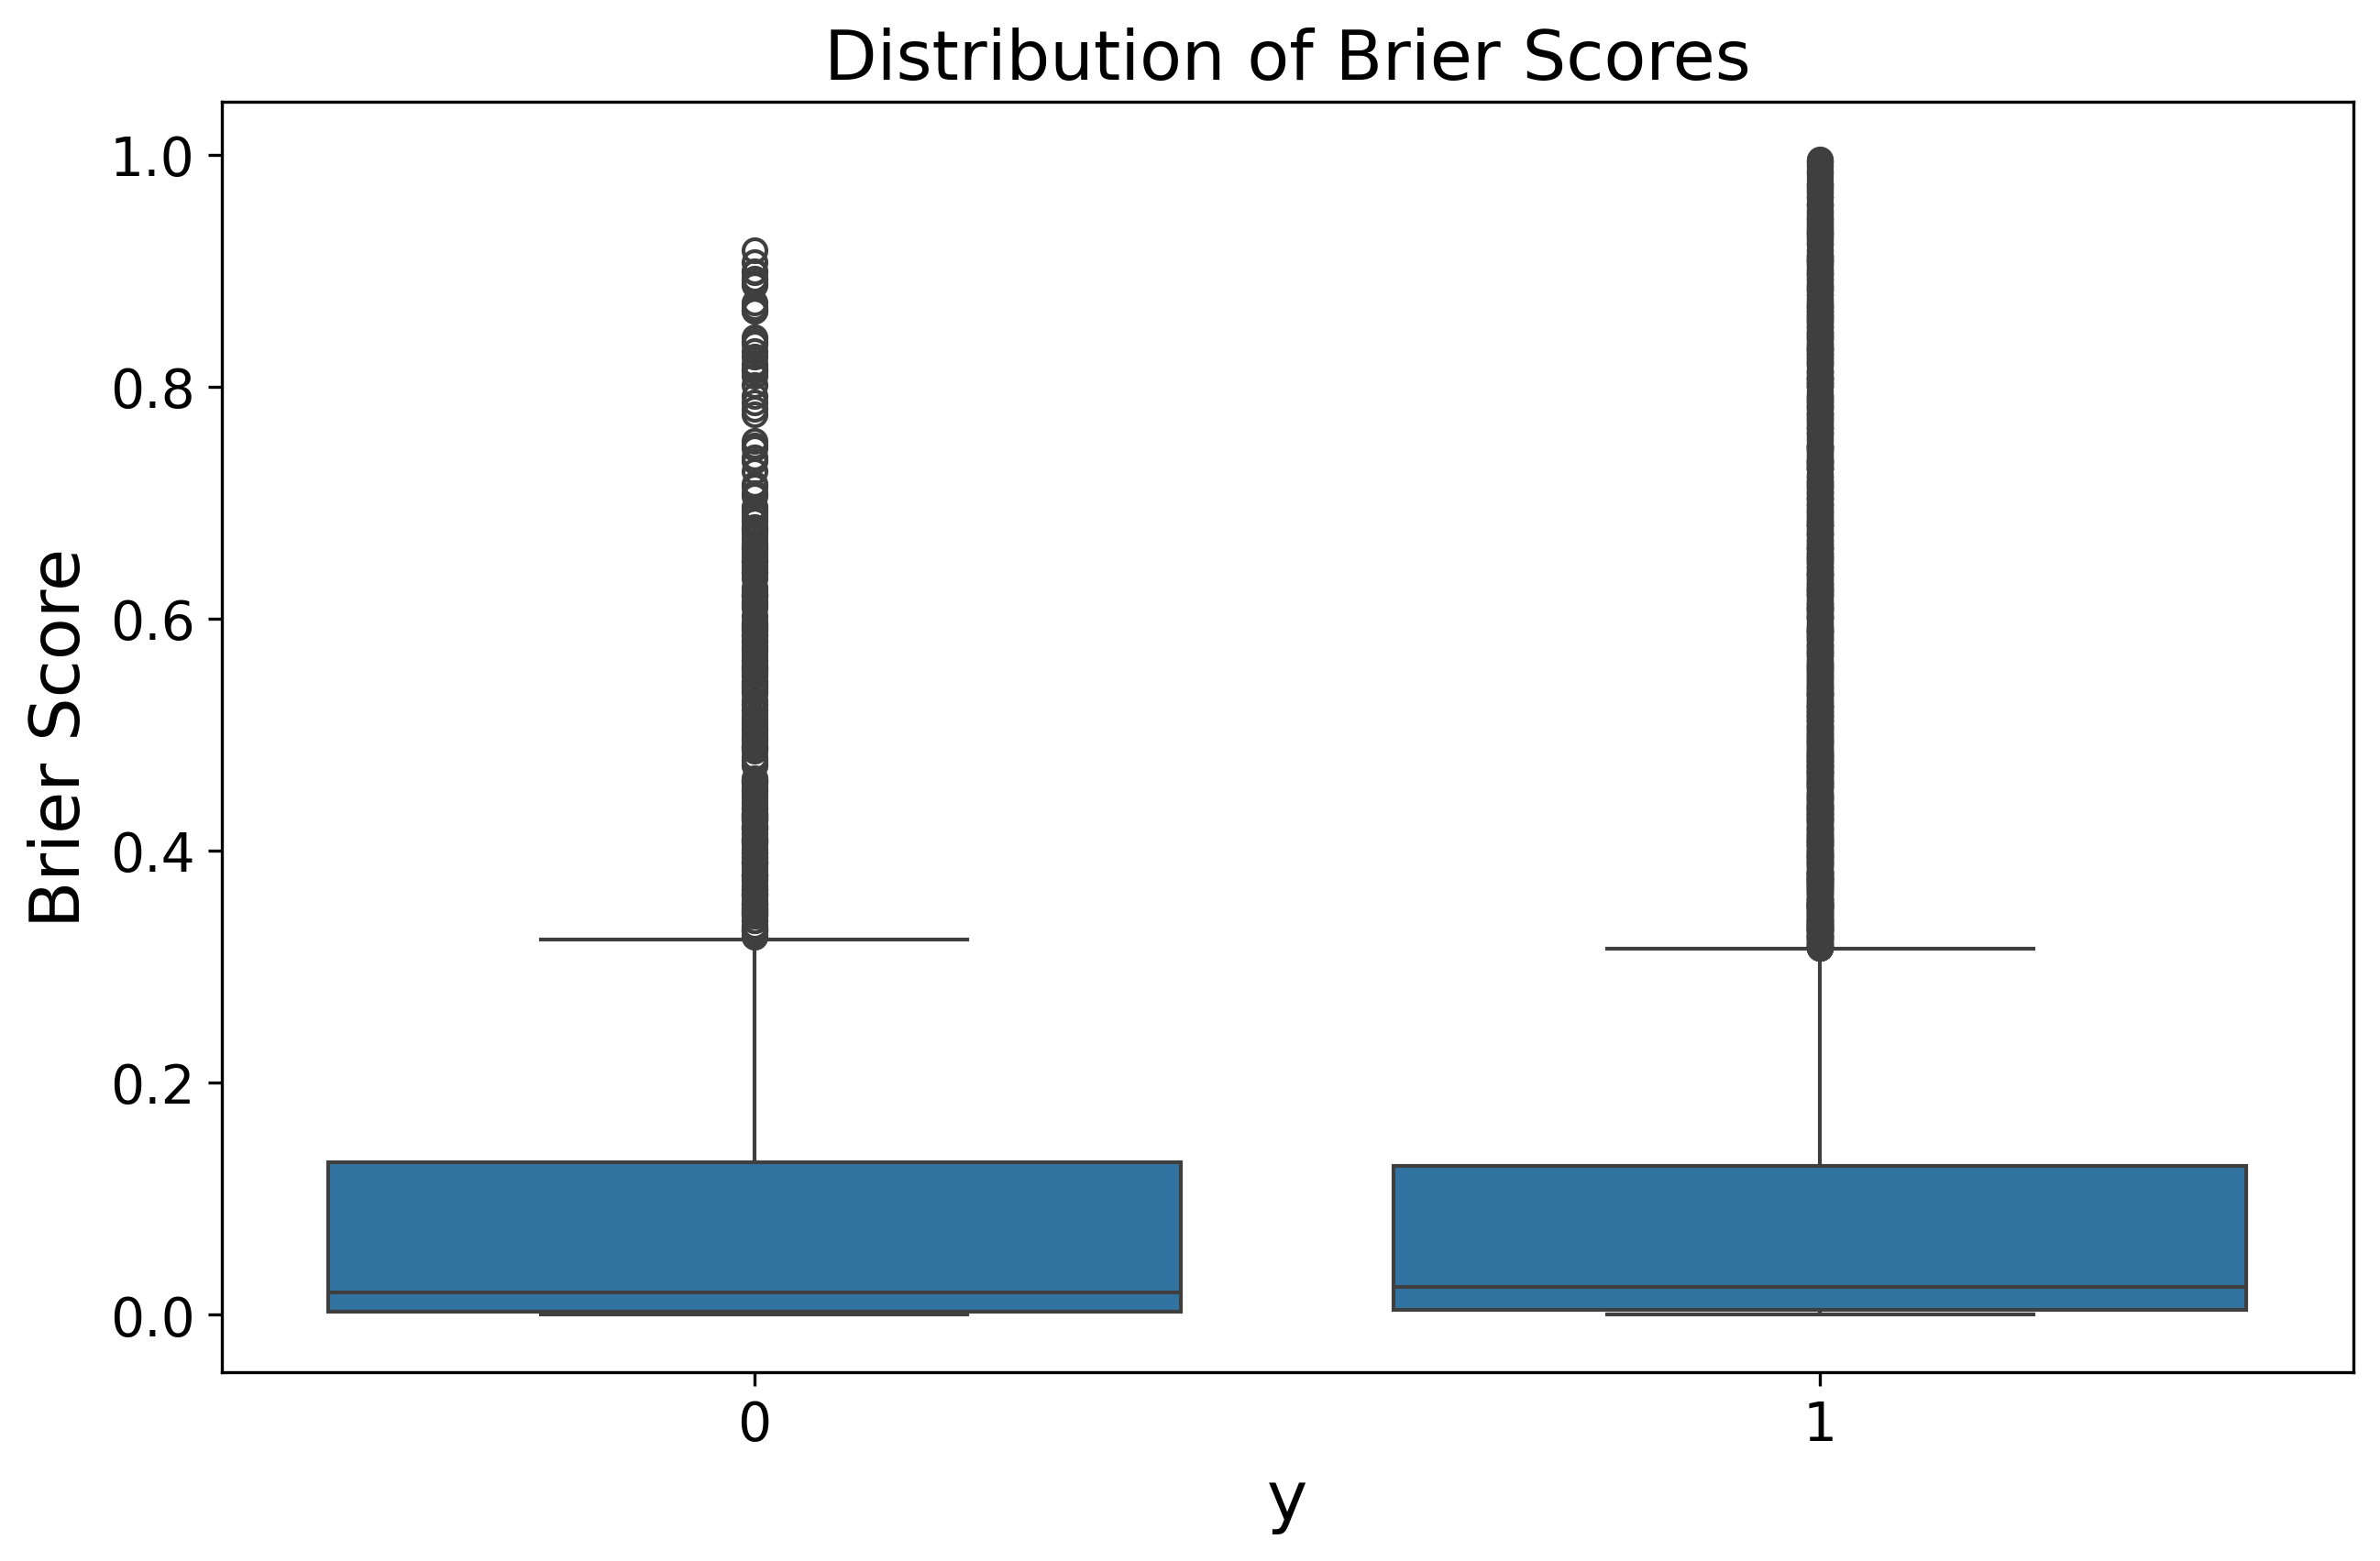


Mean Brier Score per cluster:
 Cluster
0    0.111255
1    0.181624
2    0.119799
Name: Brier_Score, dtype: float64 

Number of observations per cluster:
 Cluster
0    15131
1     2768
2     2249
Name: count, dtype: int64


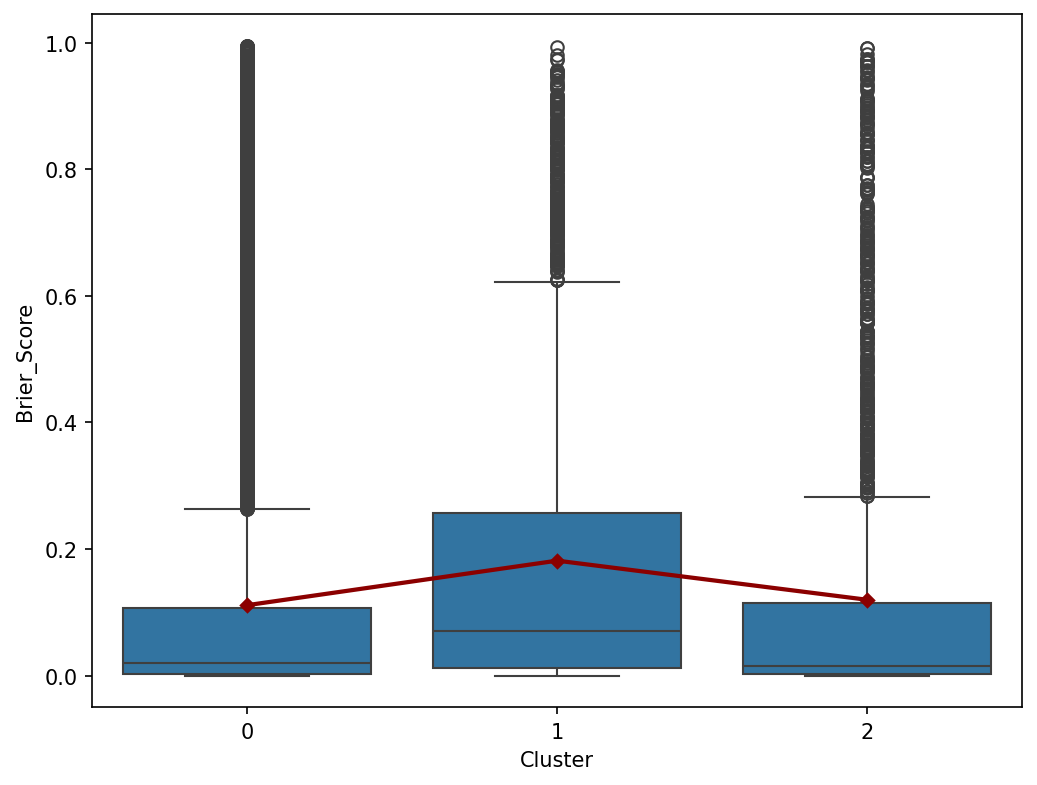

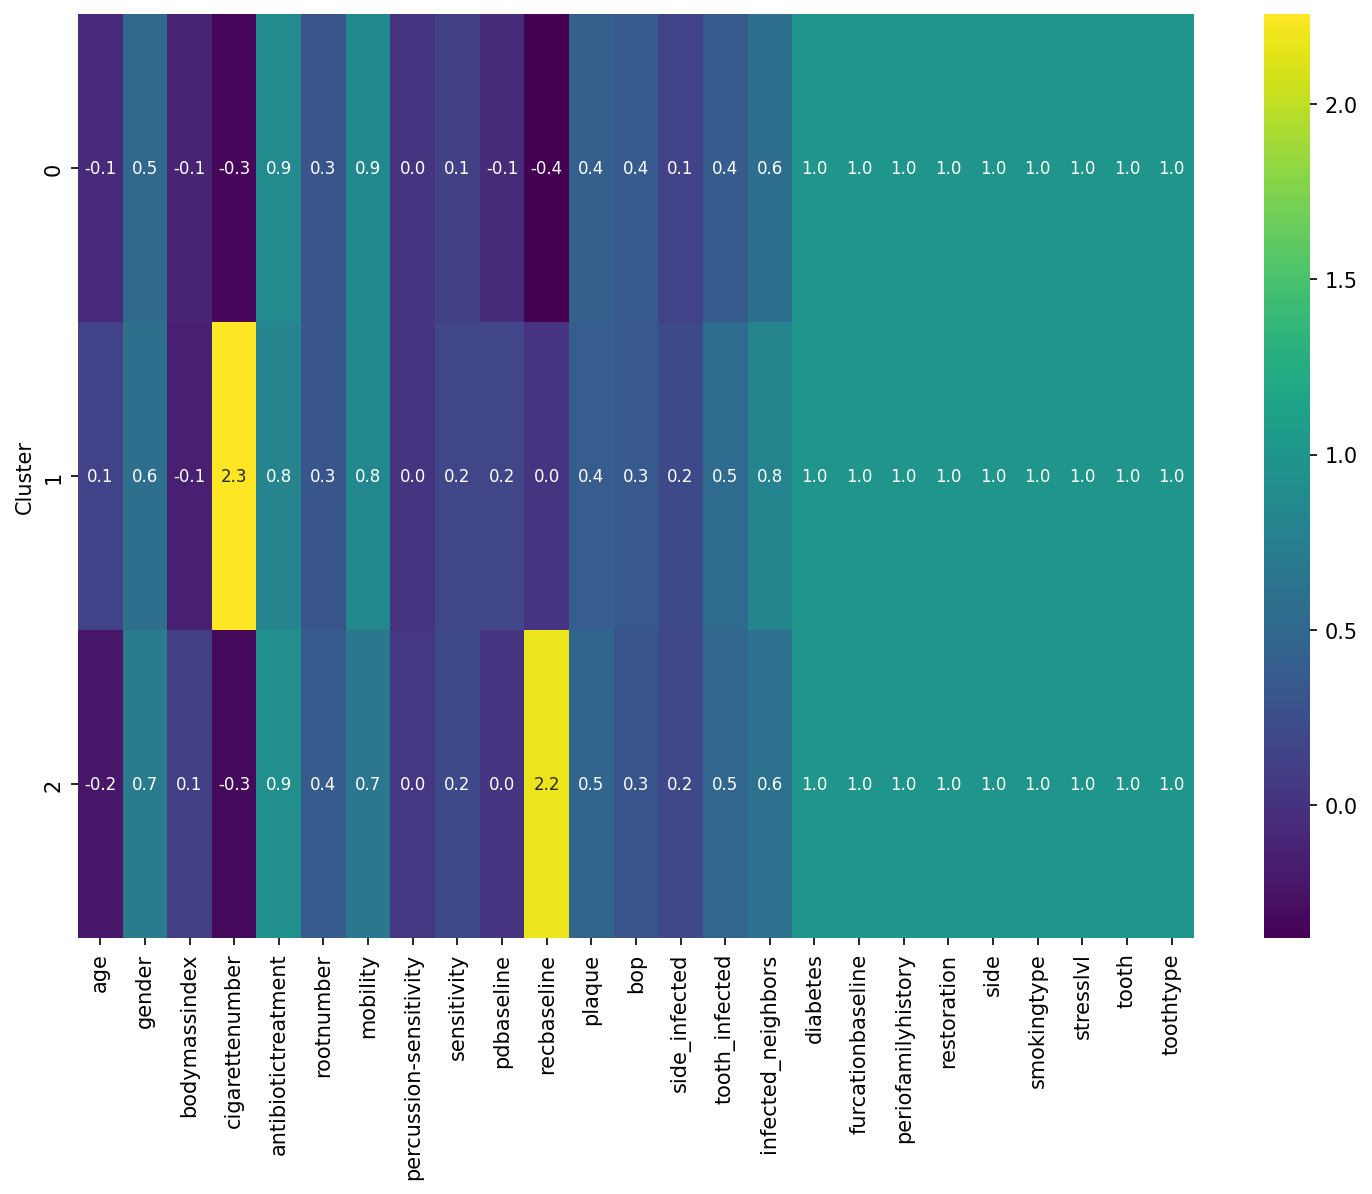

In [6]:
evaluator.wrapped_evaluation()

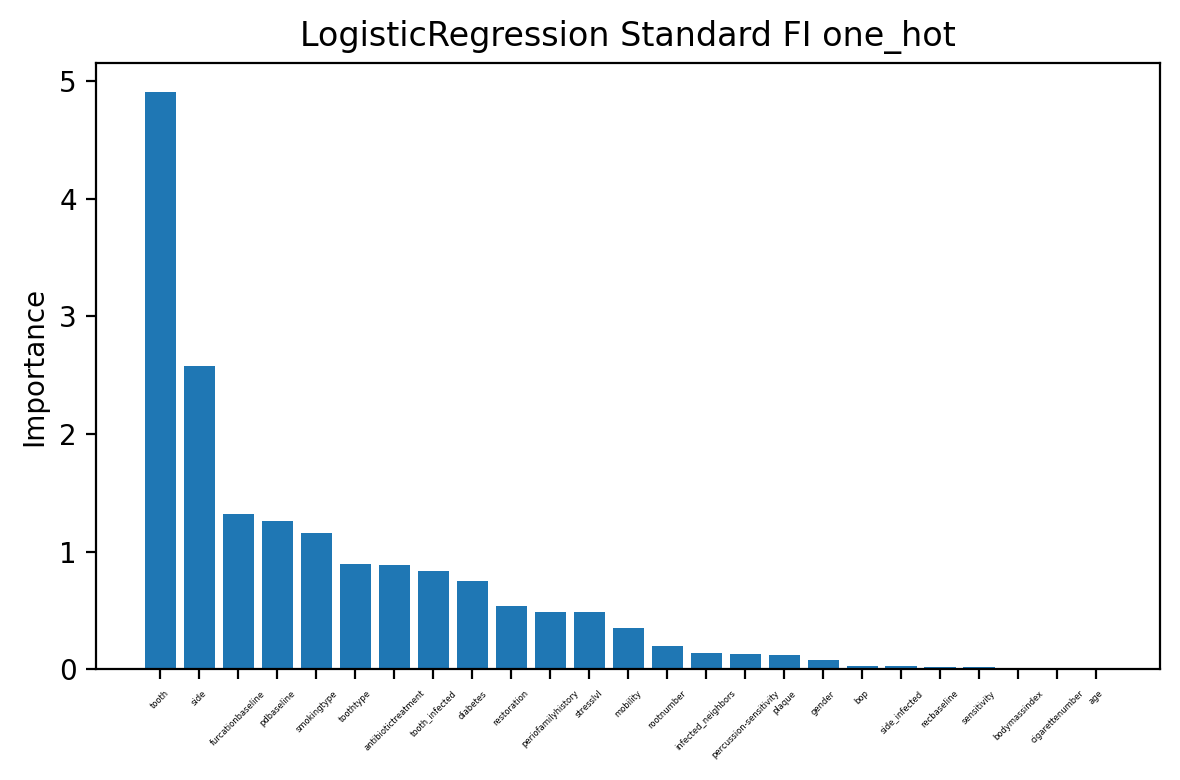

In [8]:
evaluator.evaluate_feature_importance(fi_types=["standard"])

In [9]:
patient = Patient(
    age=45,
    gender=1,
    bodymassindex=23.5,
    periofamilyhistory=1,
    diabetes=0,
    smokingtype=2,
    cigarettenumber=10,
    antibiotictreatment=0,
    stresslvl=2,
    teeth=[
        Tooth(
            tooth=11,
            toothtype=1,
            rootnumber=1,
            mobility=1,
            restoration=0,
            percussion=0,
            sensitivity=1,
            sides=[
                Side(
                    furcationbaseline=1,
                    side=1,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=2,
                    pdbaseline=3,
                    recbaseline=3,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=3,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=1,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=4,
                    pdbaseline=4,
                    recbaseline=4,
                    plaque=0,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=5,
                    pdbaseline=3,
                    recbaseline=3,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=6,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=0,
                    bop=1,
                ),  # noqa: E501
            ],
        ),
        Tooth(
            tooth=18,
            toothtype=3,
            rootnumber=2,
            mobility=0,
            restoration=1,
            percussion=1,
            sensitivity=0,
            sides=[
                Side(
                    furcationbaseline=3,
                    side=1,
                    pdbaseline=4,
                    recbaseline=5,
                    plaque=2,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=2,
                    pdbaseline=3,
                    recbaseline=3,
                    plaque=2,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=3,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=0,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=4,
                    pdbaseline=4,
                    recbaseline=4,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=5,
                    pdbaseline=5,
                    recbaseline=5,
                    plaque=0,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=3,
                    side=6,
                    pdbaseline=4,
                    recbaseline=4,
                    plaque=2,
                    bop=1,
                ),  # noqa: E501
            ],
        ),
    ],
)

_, output, results = evaluator.wrapped_patient_inference(patient=patient)  # noqa: E501
output  # noqa: E501

,tooth,side,prediction,probability
0,11,1,1,0.934480
1,11,2,1,0.900388
2,11,3,1,0.939923
3,11,4,0,0.571816
4,11,5,1,0.885270
5,11,6,1,0.896005
6,18,1,0,0.885576
7,18,2,1,0.785404
8,18,3,1,0.773620
9,18,4,0,0.772574


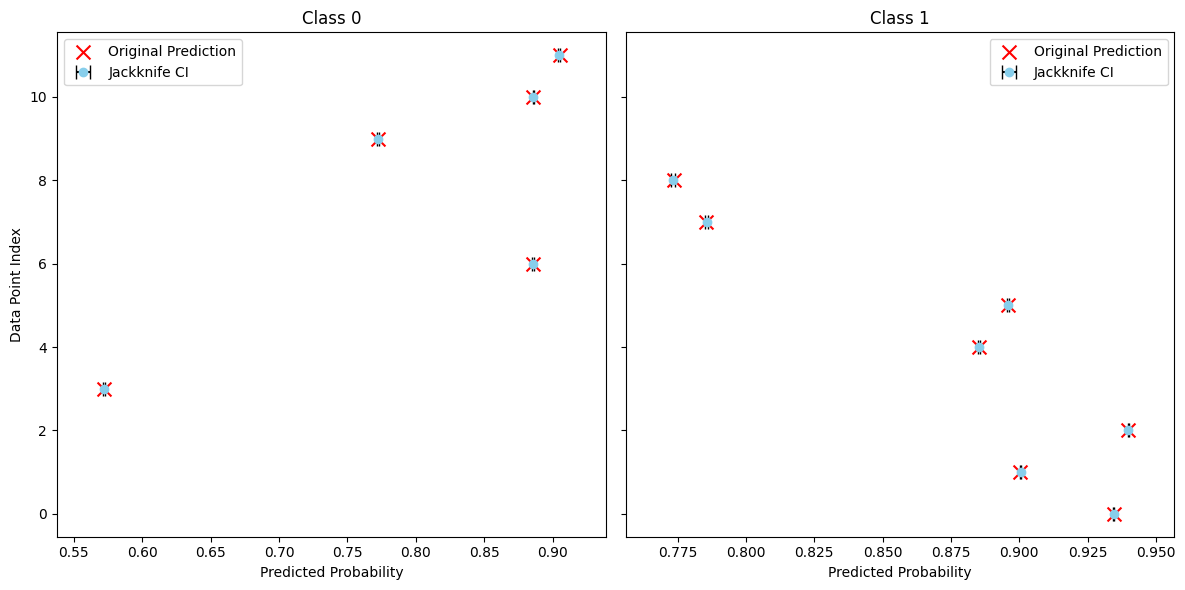

In [9]:
_, ci_plot = evaluator.wrapped_jackknife(
    patient=patient, results=results, sample_fraction=0.1
)